In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
%matplotlib inline

# Regression with the Ames Housing Dataset
a modern, more challenging alternative to the well-known Boston Housing dataset

In [2]:
train_df = pd.read_csv('house-prices-advanced-regression-techniques/train.csv')
train_df.shape, train_df.columns

((1460, 81),
 Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
        'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
        'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
        'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
        'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
        'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
        'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
        'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
        'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
        'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
        'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
        'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
        'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
      

The **Ames Housing dataset** comprises of **80 input variables** and **1 target variable**. For a description of each input variable, please see the data_description.txt included in the dataset.

## The target variable: SalePrice
Let's take a look at our target variable, "SalePrice" which is the house selling price in dollars:

In [3]:
train_df['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

C:\Users\Jessa\AppData\Roaming\Python\Python36\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


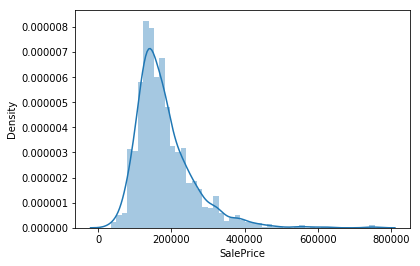

In [4]:
sns.distplot(train_df['SalePrice'])

The histogram above shows that the distribution looks like a normal distribution but one that it's skewed to the right.

Numerically, the distribution's asymmetry can be described by **Skewness** (positive means skewed to the right) and **Kurtosis** (bigger positive means "heavy-tailed"):

In [5]:
print("Skewness: %f" % (train_df['SalePrice'].skew()))
print("Kurtosis: %f" % (train_df['SalePrice'].kurt()))

Skewness: 1.882876
Kurtosis: 6.536282


# Exploring the input variables
In the next section, let's explore the variables with the eventual goal of feature selection (i.e. deciding which variables to use) and feature engineering (i.e. generating new features) for predicting house pricing.

### Correlation matrix
A quick way to get an overview of the features available is the correlation matrix.
Quick and dirty way of interpreting the correlation matrix:
* high positive correlation => likely **directly proportional**
* high negative correlation => likely **indirectly proportional**
* near 0 correlation between 2 variables means no relation

Let's try plotting the correlation matrix only for the top k correlation with target variable **SalePrice**

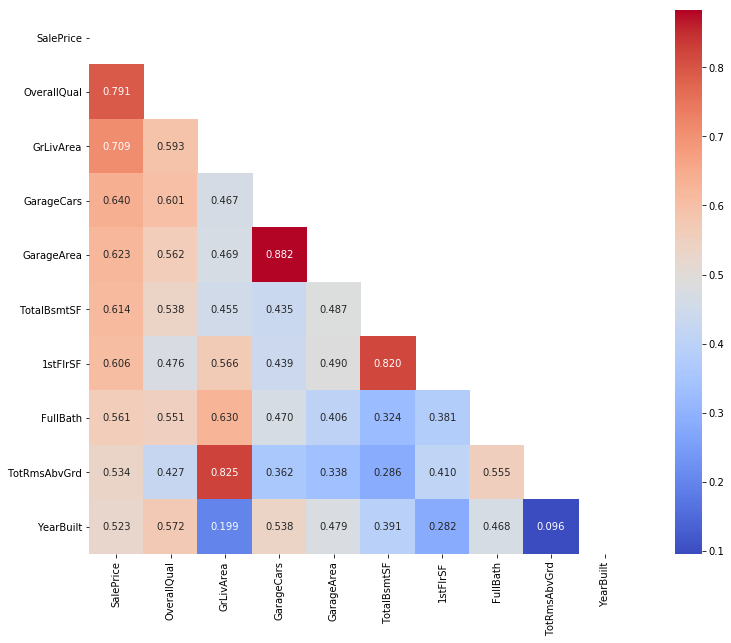

In [42]:
k = 10
cols = corr_matrix.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train_df[cols].T)
mask = np.triu(np.ones_like(cm, dtype=bool))

f, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values,square=True, cmap='coolwarm', mask=mask, fmt='.3f', annot=True)

Observations: redundant input fields (field to retain, i.e. higher corr with SalePrice, in **bold face**):
 * **GarageCars** and GarageArea
 * **TotalBsmtSF** and 1stFlrSF
 * **GrLivArea** and **TotRmsAbvGrd**

*HERE BEGINS THE SCRATCH PAPER. YOU HAVE BEEN WARNED*

#### MSSubClass: type of dwelling
This column looks like a numerical variable at first glance, but it is actually number-coded categories.

In [7]:
train_df['MSSubClass'].unique()

array([ 60,  20,  70,  50, 190,  45,  90, 120,  30,  85,  80, 160,  75,
       180,  40], dtype=int64)

... and so we must treat them as categorical data!

In [8]:
train_df['MSSubClass'] = pd.Categorical(train_df.MSSubClass)

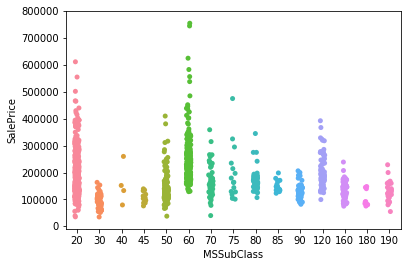

In [9]:
ax = sns.stripplot(x='MSSubClass', y='SalePrice', data=train_df)

Try plotting against SalePrice and LotArea?

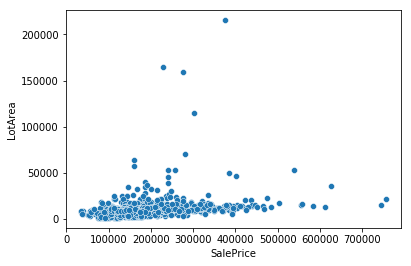

In [10]:
sns.scatterplot(data=train_df, x="SalePrice", y="LotArea")

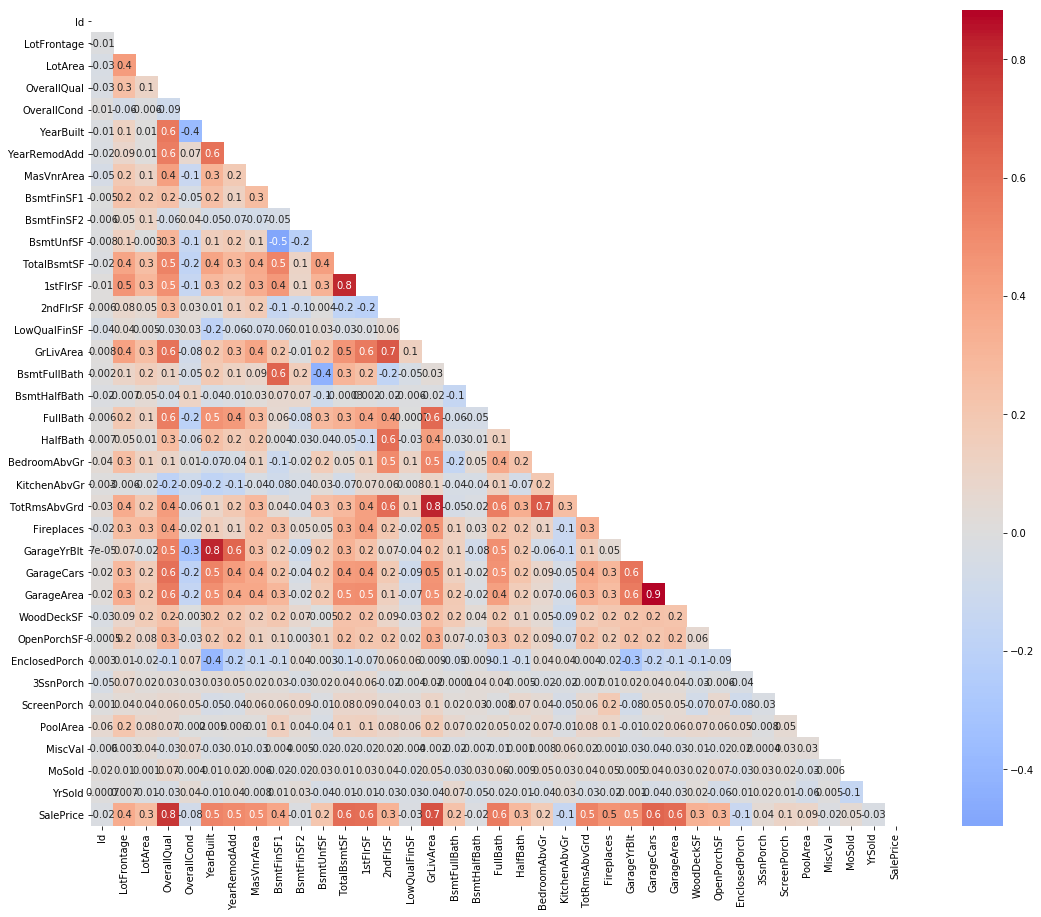

In [12]:
corr_matrix = train_df.corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

f, ax = plt.subplots(figsize=(20, 15))
sns.heatmap(corr_matrix, square=True, mask=mask, center=0.0, annot=True, fmt='.1g', cmap='coolwarm')

Observations from the correlation heatmap:
* Highly-correlated (likely redundant) fields include:
 * **GarageYrBlt** and **YearBuilt**
 * **TotRmsAbvGrd** and **GrLivArea**
 * **1stFlrSF** and **TotalBsmtSF**
 * **GarageArea** and **GarageCars**
* Input fields that are highly-correlated with our target variable, **SalePrice** include:
 * **OverallQual**
 * **GrLivArea**
 * **TotalBsmtSF** / **1stFlrSF**
 * **FullBath**
 * **GarageCars** / **GarageArea**
 

In [11]:
print(sns.__version__)

0.11.0
